<a href="https://colab.research.google.com/github/mnrazamohamed/Image-Processing-for-Cat-and-Dog-Classification/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

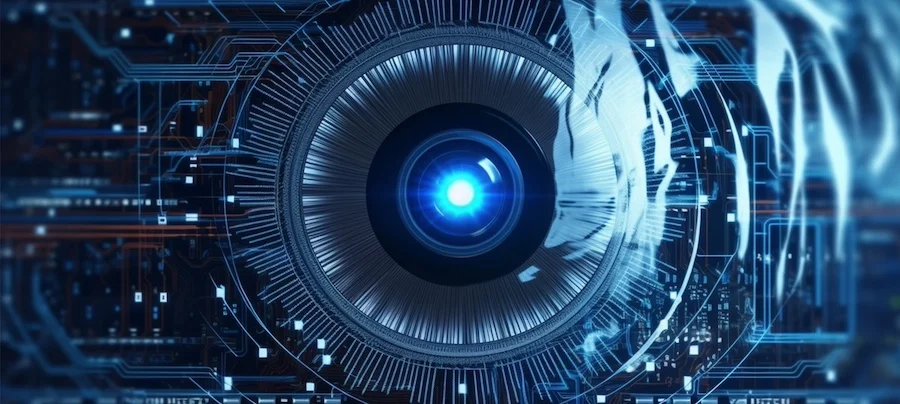

# **Deep Learning-Based Image Processing for Cat and Dog Classification**


Name: Mohamed Nawas Raza Mohamed

Student Number: 24148501

Module: Applied AI - Image Processing

Project Overview: This project focuses on image classification using deep learning and image processing techniques to distinguish between cats and dogs. Instead of relying solely on pre-trained deep learning models, image preprocessing methods such as filtering, thresholding, and edge detection are applied to enhance image quality before feeding them into a Convolutional Neural Network (CNN) for classification.

A CNN model is trained on a dataset of labeled cat and dog images, extracting features automatically to differentiate between the two classes. The goal is to develop an accurate, robust, and efficient classification model capable of recognizing cats and dogs from images with minimal human intervention.

By integrating image processing with deep learning, the project enhances image quality for better feature extraction, ultimately improving classification accuracy. The performance is evaluated using accuracy, precision, recall, and F1-score, ensuring a high-quality prediction system for real-world applications.

### Mount Google Drive

Mounts Google Drive to the Colab environment, enabling access to datasets stored in the cloud. This allows seamless integration of large datasets without requiring local storage.


In [ ]:
# Mount Google Drive to access stored files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Define Dataset Paths

Defines file paths for training and test datasets, including both structured CSV files (for labels) and zipped image files. These paths ensure correct data loading from Google Drive.


In [ ]:
# Define file paths for training and test datasets stored in Google Drive

train_path = '/content/drive/MyDrive/BCU - MSc in AI/CNN/train.csv'
test_path  = '/content/drive/MyDrive/BCU - MSc in AI/CNN/test.csv'
test_img_path  = '/content/drive/MyDrive/BCU - MSc in AI/CNN/test_images.zip'
train_img_path  = '/content/drive/MyDrive/BCU - MSc in AI/CNN/train_images.zip'


### Load Data Using Pandas

Loads training and test datasets using Pandas, a powerful data manipulation library. The CSV files contain image file names and corresponding labels (cat/dog) for supervised learning.


In [ ]:
# Import the pandas library for data manipulation
import pandas as pd

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


### Extract and Organize Image Datasets

This code extracts images from **train_images.zip** and **test_images.zip**, organizing them into separate **training** and **testing** directories. It ensures that extracted images follow the correct structure by handling nested folders, preventing duplicate files, and maintaining a clean dataset for further processing. The script also creates the necessary directories before extraction, ensuring a structured and error-free dataset for deep learning model training.


In [ ]:
import zipfile
import os
import shutil

# Define output directories for the extracted files
train_images_dir = '/content/train_images'
test_images_dir = '/content/test_images'

# Create directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)

# Extract the train_images.zip file
with zipfile.ZipFile(train_img_path, 'r') as zip_ref:
    zip_ref.extractall(train_images_dir)
print("Extracted train_images.zip to", train_images_dir)

# If the extracted folder contains an extra 'train_images' folder, move its content up
nested_train_folder = os.path.join(train_images_dir, "train_images")
if os.path.exists(nested_train_folder) and os.path.isdir(nested_train_folder):
    for file in os.listdir(nested_train_folder):
        src = os.path.join(nested_train_folder, file)
        dest = os.path.join(train_images_dir, file)
        # Remove the destination file if it exists
        if os.path.exists(dest):
            os.remove(dest)
        shutil.move(src, dest)
    os.rmdir(nested_train_folder)
    print("Moved files from nested 'train_images' folder to", train_images_dir)

# Extract the test_images.zip file
with zipfile.ZipFile(test_img_path, 'r') as zip_ref:
    zip_ref.extractall(test_images_dir)
print("Extracted test_images.zip to", test_images_dir)

# If the extracted folder contains an extra 'test_images' folder, move its content up
nested_test_folder = os.path.join(test_images_dir, "test_images")
if os.path.exists(nested_test_folder) and os.path.isdir(nested_test_folder):
    for file in os.listdir(nested_test_folder):
        src = os.path.join(nested_test_folder, file)
        dest = os.path.join(test_images_dir, file)
        if os.path.exists(dest):
            os.remove(dest)
        shutil.move(src, dest)
    os.rmdir(nested_test_folder)
    print("Moved files from nested 'test_images' folder to", test_images_dir)


Extracted train_images.zip to /content/train_images
Moved files from nested 'train_images' folder to /content/train_images
Extracted test_images.zip to /content/test_images
Moved files from nested 'test_images' folder to /content/test_images


### Display First Few Rows of the Dataset

Displays the first few rows of the train_df dataframe to inspect the dataset structure, ensuring the label column and image IDs are correctly loaded.


In [ ]:
train_df.head()

,id,label
0,1,cat
1,2,dog
2,3,cat
3,4,cat
4,5,cat


### Convert Categorical Labels to Numerical Format

Maps the label column where **"cat" → 0** and **"dog" → 1**. This conversion is necessary for training deep learning models, which require numerical values instead of text labels.


In [ ]:
# Map the label column: "cat" -> 0, "dog" -> 1
train_df['label'] = train_df['label'].map({'cat': 0, 'dog': 1})

### Check Class Distribution in the Training Dataset

Counts the occurrences of each class (0: cat, 1: dog) in the dataset. This helps identify if the dataset is imbalanced, which may affect model performance.


In [ ]:
# Check the distribution of labels in the training dataframe
print("Original label counts:")
print(train_df['label'].value_counts())


Original label counts:
label
1    5011
0    4989
Name: count, dtype: int64


### Undersampling to Balance the Dataset

This code performs **undersampling** to balance the dataset by ensuring that both classes (cats and dogs) have an equal number of samples. It first determines the minimum class count and then randomly samples that many instances from each class. This prevents model bias toward the majority class. Finally, the new balanced class distribution is printed to verify that the dataset is now evenly distributed.


In [ ]:
# Perform undersampling to balance the dataset
# Determine the minimum number of samples in any class
min_count = train_df['label'].value_counts().min()

min_count = 1000

# Group by label and sample 'min_count' examples from each group
train_df = train_df.groupby('label').apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)

# Verify the new balanced distribution
print("Balanced label counts:")
print(train_df['label'].value_counts())


Balanced label counts:
label
0    1000
1    1000
Name: count, dtype: int64


<ipython-input-8-38b8c9edf2b7>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby('label').apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)


### Visualizing Sample Images for Each Class

This code defines a function to **display sample images** of cats and dogs from the dataset. It first filters images based on their label (0: cat, 1: dog), randomly selecting a few samples. The images are then loaded and displayed using Matplotlib and PIL, with appropriate titles for each class. Finally, the function is called to visualize sample images for both cats and dogs, ensuring that the dataset is correctly labeled and structured before training.


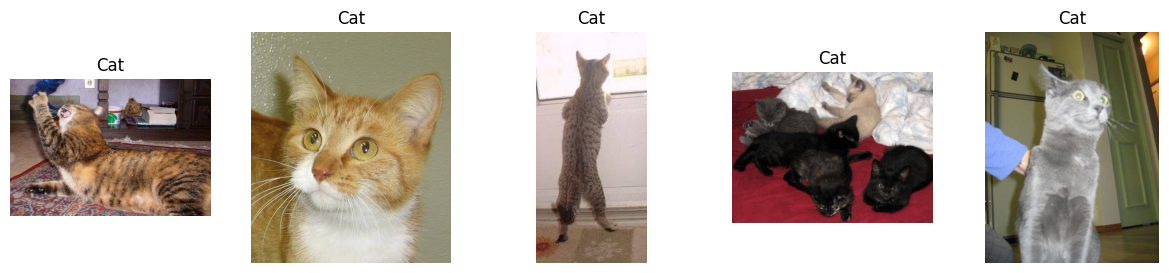

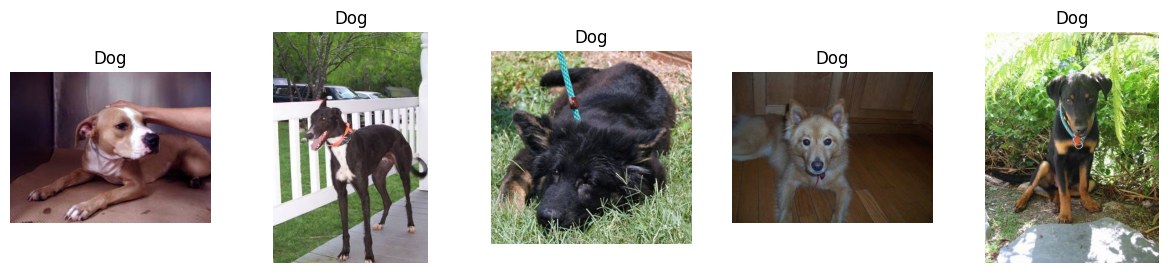

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Define a function to plot sample images from a given class label
def plot_sample_images(df, label_value, class_name, images_dir, sample_size=5):
    # Filter images based on the label
    sample_ids = df[df['label'] == label_value]['id'].sample(sample_size, random_state=42)
    plt.figure(figsize=(15, 3))
    for i, img_id in enumerate(sample_ids, 1):
        img_path = os.path.join(images_dir, f"{img_id}.jpg")
        img = Image.open(img_path)
        plt.subplot(1, sample_size, i)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Plot sample images for 'cat' (label 0) and 'dog' (label 1)
plot_sample_images(train_df, label_value=0, class_name='Cat', images_dir=train_images_dir)
plot_sample_images(train_df, label_value=1, class_name='Dog', images_dir=train_images_dir)


### Load and Sort Image Files

This code loads and sorts image files from the **training and testing directories** to ensure they are processed in the correct order. It first retrieves the list of image filenames, sorts them numerically to maintain consistency, and then loads them using the PIL library. The images are stored in separate lists (train_imgs and test_imgs) for further processing, ensuring they are correctly structured before being fed into the deep learning model.


In [ ]:
image_files = sorted(os.listdir(train_images_dir), key=lambda x: int(x.split('.')[0]))
train_imgs = []
for img_file in image_files:
    img_path = os.path.join(train_images_dir, img_file)
    img = Image.open(img_path)
    train_imgs.append(img)

test_image_files = sorted(os.listdir(train_images_dir), key=lambda x: int(x.split('.')[0]))
test_imgs = []
for img_file in test_image_files:
    img_path = os.path.join(train_images_dir, img_file)
    img = Image.open(img_path)
    test_imgs.append(img)

### Image Preprocessing for Model Input

This code defines a function to **preprocess images** before feeding them into the deep learning model. It first **converts images to RGB mode** to ensure uniformity, then **resizes them to 128×128 pixels** for consistency in model training. Additionally, **Gaussian Blur** is applied to reduce noise, followed by an **enhancement filter** to improve image details. The preprocessing function is then applied to all training and testing images, ensuring a standardized input format for the neural network.


In [ ]:
from PIL import ImageFilter

def preprocess_image(img, target_size=(128, 128), blur_radius=0.8):
    # Ensure the image is in RGB mode
    img = img.convert("RGB")

    # Resize image to target size
    img = img.resize(target_size)

    # Apply Gaussian Blur for slight noise reduction
    img = img.filter(ImageFilter.GaussianBlur(radius=blur_radius))

    img = img.filter(ImageFilter.DETAIL)

    return img

# Apply the preprocessing function to all images in train_imgs
train_imgs = [preprocess_image(img) for img in train_imgs]
test_imgs = [preprocess_image(img) for img in test_imgs]


### Display Preprocessed Images

This code visualizes a subset of the **resized and preprocessed images** to ensure the preprocessing steps were correctly applied. It selects the first 10 images from the training dataset and arranges them in a **2-row, 5-column grid** using Matplotlib. The image titles correspond to their filenames, and the axis labels are removed for better readability. This step is crucial for verifying that the images are correctly formatted before training the deep learning model.


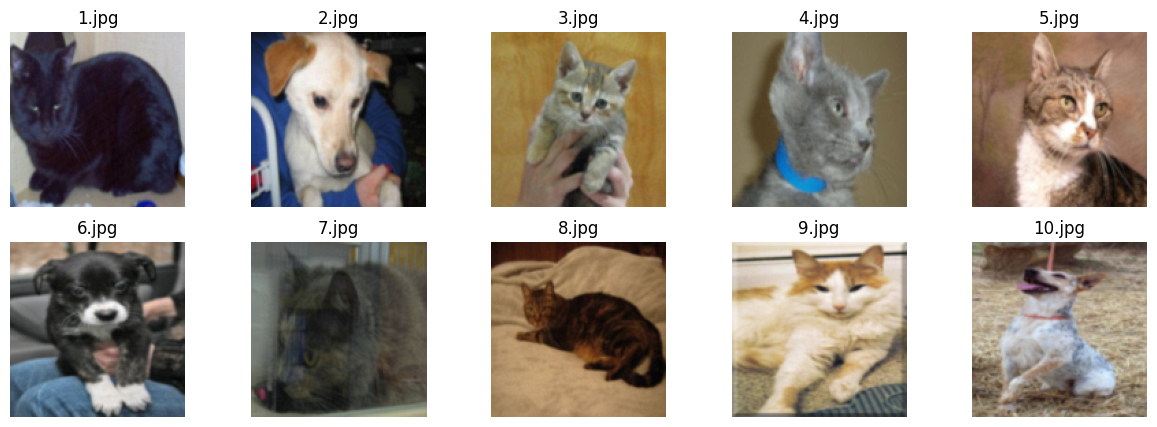

In [ ]:
# Display the resized images
plt.figure(figsize=(15, 5))
for i, img in enumerate(train_imgs[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(image_files[i])
    plt.axis('off')
plt.show()


### Convert Processed Images to NumPy Arrays for Model Training

This code prepares the dataset for deep learning by converting **preprocessed images into NumPy arrays** and extracting corresponding labels. First, the dataset is **sorted by image ID** to ensure proper alignment. Then, images from train_imgs are selected based on the IDs in the balanced dataframe. The images are **normalized by scaling pixel values to the range [0,1]** to improve model performance. Finally, the labels are extracted, and the shapes of the training data (X_train_balanced) and labels (y_train_balanced) are printed for verification.


In [ ]:
import numpy as np

# Ensure the balanced dataframe is sorted by id to align with the image list
balanced_df_sorted = train_df.sort_values(by='id').reset_index(drop=True)

# Create a list of images corresponding to the ids in balanced_df.
# Since processed_train_imgs[i] corresponds to id = i+1, we select images using:
balanced_images = [train_imgs[int(img_id) - 1] for img_id in balanced_df_sorted['id']]

# Convert the list of PIL images into a NumPy array and scale pixel values to [0,1]
X_train_balanced = np.array([np.array(img) for img in balanced_images], dtype='float32') / 255.0

# Extract labels from balanced_df
y_train_balanced = balanced_df_sorted['label'].values

# Verify shapes
print("X_train_balanced shape:", X_train_balanced.shape)
print("y_train_balanced shape:", y_train_balanced.shape)


X_train_balanced shape: (2000, 128, 128, 3)
y_train_balanced shape: (2000,)


### Visualizing Random Samples from the Processed Dataset

This code randomly selects **10 samples** from the balanced training dataset and visualizes them using Matplotlib. Each image is displayed along with its corresponding **label ("Cat" or "Dog")** and **original ID** from the dataset. The images are already normalized to [0,1], ensuring compatibility with the deep learning model. This visualization helps confirm that the data is correctly labeled and preprocessed before training.


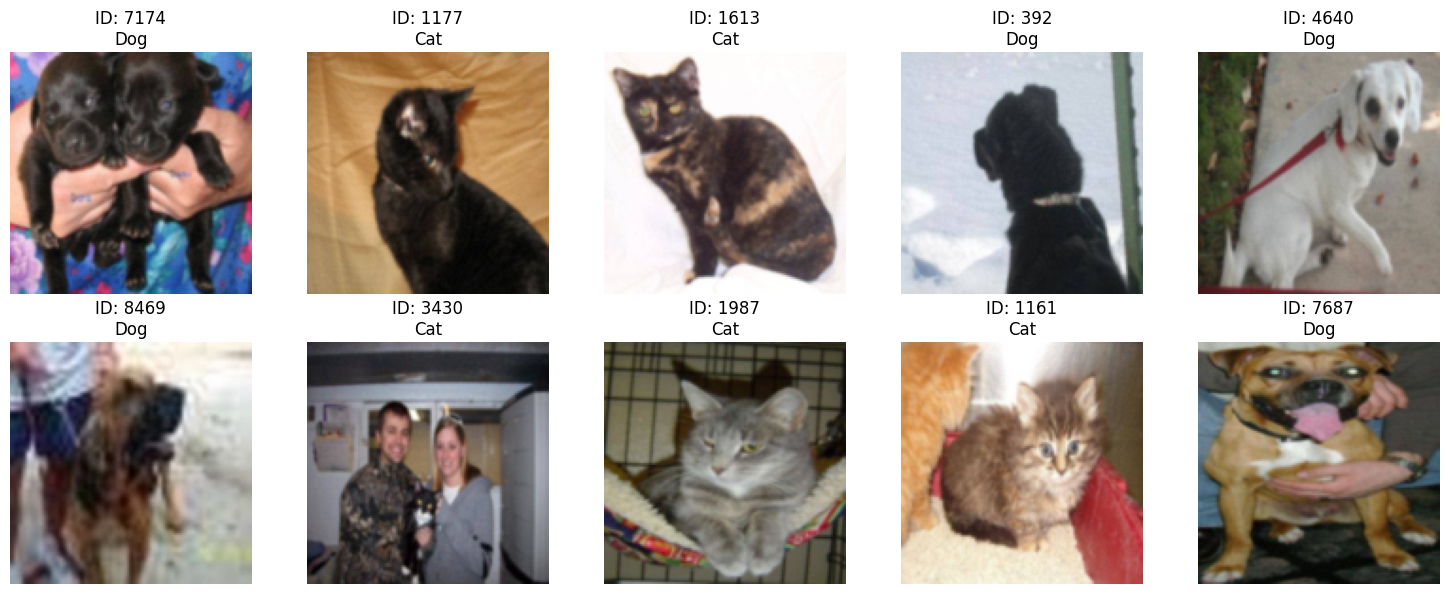

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set number of samples to visualize
num_samples = 10

# Randomly select indices from your balanced training set
indices = np.random.choice(len(X_train_balanced), num_samples, replace=False)

# Create a figure to display the images
plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    # Display the image (images are already scaled to [0, 1])
    plt.imshow(X_train_balanced[idx])

    # Retrieve the corresponding label and id (if available)
    label = y_train_balanced[idx]
    # Assuming label: 0 -> Cat, 1 -> Dog
    label_str = "Dog" if label == 1 else "Cat"

    # Optionally, show the original id from the balanced dataframe for traceability
    img_id = balanced_df_sorted['id'].iloc[idx]
    plt.title(f"ID: {img_id}\n{label_str}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Model

### Check Number of Available GPUs

Prints the total number of **GPUs** detected by TensorFlow for accelerating deep learning tasks.


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### List GPU Devices

Displays details of the available **GPU** devices, including their names and types.


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Splitting Data into Training and Validation Sets

Splits the **balanced dataset** into **80% training** and **20% validation** using train_test_split. This ensures that the model is trained on a large portion of the data while keeping a separate validation set for performance evaluation.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_balanced, y_train_balanced, test_size=0.2, random_state=42
)

### Initialize Model Storage Dictionaries

Creates empty dictionaries to store **trained models** and their corresponding **performance scores**. This helps in tracking different model architectures and their evaluation metrics.


In [ ]:
# Initialize dictionaries to store models and scores
models = {}
model_scores = {}

### Install Optuna for Hyperparameter Tuning

Installs **Optuna**, an automated hyperparameter optimization library. Optuna will be used to find the best hyperparameters for training a deep learning model efficiently.


In [ ]:
# Cell 1: Install Optuna
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.1 MB/s eta 0:00:00


### CNN Model Optimization Using Optuna

This code defines an **Optuna-based hyperparameter optimization** process to train a **Convolutional Neural Network (CNN)** for binary image classification (cat vs. dog). It explores various hyperparameters, including **learning rate, LeakyReLU alpha, L2 regularization, number of filters, dense units, and dropout rates**. The CNN consists of **three convolutional layers**, followed by **global average pooling** and **fully connected layers**.

The **Optuna objective function** builds a CNN with the suggested hyperparameters, compiles it using **Adam optimizer**, and trains it with **early stopping and learning rate scheduling**. The model is evaluated using an **F1 score**, and the best-performing model is stored for later use. This approach ensures the selection of an optimal architecture for high-accuracy classification.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, LeakyReLU, GlobalAveragePooling2D, Input
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import optuna
from optuna.trial import Trial

# Custom F1 metric
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    fp = tf.reduce_sum((1 - y_true) * y_pred, axis=0)
    fn = tf.reduce_sum(y_true * (1 - y_pred), axis=0)
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1

# Global storage
best_model = None
best_score = 0.0
history = None

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Objective function for Optuna
def objective(trial: Trial):
    global best_model, best_score, history

    # Hyperparameters to tune
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    alpha = trial.suggest_float('leakyrelu_alpha', 1e-3, 1e-1, log=True)
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-2, log=True)
    filters1 = trial.suggest_int('filters1', 16, 64, step=16)
    filters2 = trial.suggest_int('filters2', 32, 128, step=32)
    filters3 = trial.suggest_int('filters3', 64, 256, step=64)
    units_dense1 = trial.suggest_int('units_dense1', 32, 256, step=32)
    dropout_conv = trial.suggest_float('dropout_conv', 0.0, 0.5)
    dropout_dense = trial.suggest_float('dropout_dense', 0.0, 0.7)

    # Build the CNN
    model = Sequential([
        Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        Conv2D(filters1, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg)),
        BatchNormalization(),
        LeakyReLU(negative_slope=alpha),  # Explicitly pass alpha
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_conv),

        Conv2D(filters2, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg)),
        BatchNormalization(),
        LeakyReLU(negative_slope=alpha),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_conv),

        Conv2D(filters3, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg)),
        BatchNormalization(),
        LeakyReLU(negative_slope=alpha),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_conv),

        GlobalAveragePooling2D(),

        Dense(units_dense1, kernel_regularizer=regularizers.l2(l2_reg)),
        BatchNormalization(),
        LeakyReLU(negative_slope=alpha),
        Dropout(dropout_dense),

        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
    )

    # Callbacks
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=0
    )
    lr_scheduler = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )

    # Train the model (assuming X_train, y_train, X_val, y_val are defined)
    history_temp = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=50,
        validation_data=(X_val, y_val),
        callbacks=[early_stop, lr_scheduler],
        verbose=0
    )

    # Evaluate F1 score
    y_pred = model.predict(X_val)
    f1_val = tf.reduce_mean(f1_score(tf.constant(y_val), tf.constant(y_pred))).numpy()

    # Update best model
    if f1_val > best_score:
        best_score = f1_val
        best_model = tf.keras.models.clone_model(model)
        best_model.set_weights(model.get_weights())
        history = history_temp

    return f1_val

### Running Optuna for Hyperparameter Optimization

This code initializes and runs an **Optuna study** to optimize the CNN model's hyperparameters. The **objective function** is designed to maximize the **F1 score**, ensuring better classification performance. The study runs **20 trials**, evaluating different hyperparameter combinations to find the most optimal model configuration.


In [ ]:
# Create and run Optuna study
study = optuna.create_study(direction='maximize', study_name='CNN Optimizer')
study.optimize(objective, n_trials=20)

[I 2025-03-14 08:16:25,145] A new study created in memory with name: CNN Optimizer


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2025-03-14 08:17:05,765] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 1.736445020082435e-05, 'leakyrelu_alpha': 0.002508552130625586, 'l2_reg': 0.0001241159819257469, 'filters1': 48, 'filters2': 32, 'filters3': 128, 'units_dense1': 128, 'dropout_conv': 0.05573955384310669, 'dropout_dense': 0.5811175008594944}. Best is trial 0 with value: 0.0.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2025-03-14 08:17:50,462] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.000134002859925087, 'leakyrelu_alpha': 0.013221509814754647, 'l2_reg': 0.0004209834095354371, 'filters1': 32, 'filters2': 64, 'filters3': 256, 'units_dense1': 32, 'dropout_conv': 0.4647089584510826, 'dropout_dense': 0.5043771916751271}. Best is trial 0 with value: 0.0.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2025-03-14 08:18:32,489] Trial 2 finished with value: 0.28609511256217957 and parameters: {'learning_rate': 0.0008473177533721893, 'leakyrelu_alpha': 0.05835554925889361, 'l2_reg': 4.57650552171735e-05, 'filters1': 48, 'filters2': 32, 'filters3': 64, 'units_dense1': 128, 'dropout_conv': 0.48131677682198654, 'dropout_dense': 0.3371886427521821}. Best is trial 2 with value: 0.28609511256217957.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2025-03-14 08:20:33,658] Trial 3 finished with value: 0.3360702097415924 and parameters: {'learning_rate': 0.002049794070861865, 'leakyrelu_alpha': 0.010245834944304949, 'l2_reg': 0.0001301933115120854, 'filters1': 32, 'filters2': 128, 'filters3': 192, 'units_dense1': 160, 'dropout_conv': 0.2725004079868664, 'dropout_dense': 0.29208026497294276}. Best is trial 3 with value: 0.3360702097415924.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2025-03-14 08:21:54,661] Trial 4 finished with value: 0.3197944760322571 and parameters: {'learning_rate': 0.0012601714666215155, 'leakyrelu_alpha': 0.013121124110683068, 'l2_reg': 0.0023808824858795137, 'filters1': 48, 'filters2': 32, 'filters3': 64, 'units_dense1': 128, 'dropout_conv': 0.3250090418536345, 'dropout_dense': 0.2774429632109264}. Best is trial 3 with value: 0.3360702097415924.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2025-03-14 08:22:42,041] Trial 5 finished with value: 0.0 and parameters: {'learning_rate': 0.0005292202361428058, 'leakyrelu_alpha': 0.0019487070808507517, 'l2_reg': 0.001359179959168632, 'filters1': 64, 'filters2': 32, 'filters3': 192, 'units_dense1': 192, 'dropout_conv': 0.06116283353783608, 'dropout_dense': 0.3651129040165997}. Best is trial 3 with value: 0.3360702097415924.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2025-03-14 08:23:30,327] Trial 6 finished with value: 0.0 and parameters: {'learning_rate': 7.642585411724731e-05, 'leakyrelu_alpha': 0.01392534175446015, 'l2_reg': 1.4510580404831747e-05, 'filters1': 64, 'filters2': 96, 'filters3': 128, 'units_dense1': 256, 'dropout_conv': 0.43089900092240324, 'dropout_dense': 0.5004370490138291}. Best is trial 3 with value: 0.3360702097415924.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2025-03-14 08:24:17,553] Trial 7 finished with value: 0.0 and parameters: {'learning_rate': 0.00021894771798966156, 'leakyrelu_alpha': 0.0031267905095023925, 'l2_reg': 2.3427213071567322e-05, 'filters1': 64, 'filters2': 64, 'filters3': 192, 'units_dense1': 64, 'dropout_conv': 0.4722058900605454, 'dropout_dense': 0.24904157757215167}. Best is trial 3 with value: 0.3360702097415924.


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


[I 2025-03-14 08:25:25,788] Trial 8 finished with value: 0.33493292331695557 and parameters: {'learning_rate': 0.0005881573280525128, 'leakyrelu_alpha': 0.004788723297969077, 'l2_reg': 0.0010723303912876406, 'filters1': 32, 'filters2': 96, 'filters3': 128, 'units_dense1': 160, 'dropout_conv': 0.007323277875007972, 'dropout_dense': 0.3153904276843662}. Best is trial 3 with value: 0.3360702097415924.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2025-03-14 08:26:05,911] Trial 9 finished with value: 0.0 and parameters: {'learning_rate': 0.00011424204738781753, 'leakyrelu_alpha': 0.03549641011754022, 'l2_reg': 0.0004647990611011115, 'filters1': 64, 'filters2': 128, 'filters3': 192, 'units_dense1': 128, 'dropout_conv': 0.3214409697334368, 'dropout_dense': 0.17891421436758415}. Best is trial 3 with value: 0.3360702097415924.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2025-03-14 08:27:57,438] Trial 10 finished with value: 0.38260123133659363 and parameters: {'learning_rate': 0.009026644082873443, 'leakyrelu_alpha': 0.0011136620292777617, 'l2_reg': 0.006452280965492194, 'filters1': 16, 'filters2': 128, 'filters3': 256, 'units_dense1': 224, 'dropout_conv': 0.170069946242996, 'dropout_dense': 0.013866089284983452}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


[I 2025-03-14 08:29:46,104] Trial 11 finished with value: 0.27276960015296936 and parameters: {'learning_rate': 0.009854938642888684, 'leakyrelu_alpha': 0.0010314847189827954, 'l2_reg': 0.008341052504394054, 'filters1': 16, 'filters2': 128, 'filters3': 256, 'units_dense1': 224, 'dropout_conv': 0.18122247945166992, 'dropout_dense': 0.029915267584823546}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2025-03-14 08:31:41,090] Trial 12 finished with value: 0.32216721773147583 and parameters: {'learning_rate': 0.008460697216510212, 'leakyrelu_alpha': 0.006569600734929771, 'l2_reg': 0.00011092443096521514, 'filters1': 16, 'filters2': 128, 'filters3': 256, 'units_dense1': 192, 'dropout_conv': 0.16803042168806184, 'dropout_dense': 0.010372661479538692}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2025-03-14 08:33:29,719] Trial 13 finished with value: 0.2925800383090973 and parameters: {'learning_rate': 0.0034638088877978787, 'leakyrelu_alpha': 0.028730221381029205, 'l2_reg': 0.009844433431198252, 'filters1': 16, 'filters2': 96, 'filters3': 256, 'units_dense1': 256, 'dropout_conv': 0.23110910608617546, 'dropout_dense': 0.1317993849840663}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


[I 2025-03-14 08:35:11,301] Trial 14 finished with value: 0.3014674782752991 and parameters: {'learning_rate': 0.0024422470857908903, 'leakyrelu_alpha': 0.0010207166973885756, 'l2_reg': 0.00012729425688299455, 'filters1': 32, 'filters2': 128, 'filters3': 192, 'units_dense1': 192, 'dropout_conv': 0.31166278402917036, 'dropout_dense': 0.1210878453830995}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2025-03-14 08:37:01,272] Trial 15 finished with value: 0.29895058274269104 and parameters: {'learning_rate': 0.0033691956349253226, 'leakyrelu_alpha': 0.0070726616103751385, 'l2_reg': 0.0036526864050226548, 'filters1': 16, 'filters2': 96, 'filters3': 256, 'units_dense1': 224, 'dropout_conv': 0.14416819776362633, 'dropout_dense': 0.6852554375066278}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2025-03-14 08:37:40,525] Trial 16 finished with value: 0.0 and parameters: {'learning_rate': 0.0020016295083867446, 'leakyrelu_alpha': 0.09788987783334513, 'l2_reg': 5.3908634039900457e-05, 'filters1': 32, 'filters2': 128, 'filters3': 192, 'units_dense1': 96, 'dropout_conv': 0.24682403626761903, 'dropout_dense': 0.4199887021090305}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2025-03-14 08:38:52,520] Trial 17 finished with value: 0.3268643617630005 and parameters: {'learning_rate': 0.005713175195809685, 'leakyrelu_alpha': 0.021821089254981833, 'l2_reg': 0.00024829012271163683, 'filters1': 16, 'filters2': 128, 'filters3': 256, 'units_dense1': 160, 'dropout_conv': 0.3862500463591468, 'dropout_dense': 0.20400586605641743}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


[I 2025-03-14 08:40:08,910] Trial 18 finished with value: 0.3209829032421112 and parameters: {'learning_rate': 0.001458929260406198, 'leakyrelu_alpha': 0.004114187681425033, 'l2_reg': 0.0008602499338309921, 'filters1': 32, 'filters2': 64, 'filters3': 192, 'units_dense1': 224, 'dropout_conv': 0.1255036271959944, 'dropout_dense': 0.09756089571865431}. Best is trial 10 with value: 0.38260123133659363.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2025-03-14 08:41:10,201] Trial 19 finished with value: 0.2938631474971771 and parameters: {'learning_rate': 0.004708710005074425, 'leakyrelu_alpha': 0.0017067340954165496, 'l2_reg': 0.0038233666018435857, 'filters1': 16, 'filters2': 96, 'filters3': 128, 'units_dense1': 192, 'dropout_conv': 0.21090084984982727, 'dropout_dense': 0.40980700312331364}. Best is trial 10 with value: 0.38260123133659363.


### Displaying Optuna Study Results

This code prints the **best validation precision** obtained from the Optuna study, the **total number of trials**, and the **best set of hyperparameters**. It helps in identifying the most effective configuration for the CNN model based on precision performance.


In [ ]:
# Results
print("Best validation precision from study:", best_score)
print("Number of finished trials:", len(study.trials))
print("Best trial parameters:", study.best_trial.params)
print("Best value (Validation Precision):", study.best_value)

best_params = study.best_trial.params
print("Best parameters:", best_params)

Best validation precision from study: 0.38260123
Number of finished trials: 20
Best trial parameters: {'learning_rate': 0.009026644082873443, 'leakyrelu_alpha': 0.0011136620292777617, 'l2_reg': 0.006452280965492194, 'filters1': 16, 'filters2': 128, 'filters3': 256, 'units_dense1': 224, 'dropout_conv': 0.170069946242996, 'dropout_dense': 0.013866089284983452}
Best value (Validation Precision): 0.38260123133659363
Best parameters: {'learning_rate': 0.009026644082873443, 'leakyrelu_alpha': 0.0011136620292777617, 'l2_reg': 0.006452280965492194, 'filters1': 16, 'filters2': 128, 'filters3': 256, 'units_dense1': 224, 'dropout_conv': 0.170069946242996, 'dropout_dense': 0.013866089284983452}


### Displaying the Best Model Architecture

This code prints the **summary of the best CNN model** found by Optuna. It provides details on the **layer structure, number of parameters, and configuration**, helping to understand the model's complexity and design.


In [ ]:
best_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 128, 128, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_44 (LeakyReLU)           │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 64, 64, 128)         │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_45 (LeakyReLU)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_46 (LeakyReLU)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 224)                 │          57,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 224)                 │             896 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_47 (LeakyReLU)           │ (None, 224)                 │              

 Total params: 374,465 (1.43 MB)

 Trainable params: 373,217 (1.42 MB)

 Non-trainable params: 1,248 (4.88 KB)

### Model Evaluation and Performance Metrics

This code evaluates the **best CNN model** by computing key metrics on the **training and validation sets**. The predictions are made using a threshold of 0.5, converting probabilities into binary labels (0 or 1).

The evaluation includes:
- **Accuracy**: Measures the overall correctness of predictions.
- **Precision**: Indicates how many of the predicted positives (dogs) are actually correct.
- **Recall**: Reflects how many actual positives were correctly identified.
- **F1 Score**: A balance between precision and recall.
- **Confusion Matrix**: Provides a breakdown of correct and incorrect predictions.

The computed scores are stored in model_scores, and the best model is saved in models. The results are printed for easy interpretation.


In [ ]:
y_train_pred = (best_model.predict(X_train) > 0.5).astype(int)
y_val_pred = (best_model.predict(X_val) > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
acc_diff = train_acc - val_acc
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
conf_m = confusion_matrix(y_val, y_val_pred)

model_scores = {'CNN': {
    'training_accuracy': train_acc,
    'validation_accuracy': val_acc,
    'train_val_acc_diff': acc_diff,
    'precision': prec,
    'recall': rec,
    'f1_score': f1,
    'confusion_matrix': conf_m
}}

models = {'CNN': best_model}

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_m)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step
Training Accuracy: 0.6763
Validation Accuracy: 0.6725
Precision: 0.6488
Recall: 0.7734
F1 Score: 0.7056
Confusion Matrix:
 [[112  85]
 [ 46 157]]


### Model Training Performance Visualization

This code visualizes the **training process** of the CNN model by plotting key performance metrics over the epochs.

1. **Loss Curve**: Shows the trend of training and validation loss, helping to identify overfitting or underfitting.
2. **Accuracy Plot**: Displays how well the model classifies the images over time.
3. **Precision Graph**: Measures how many predicted positives (dogs) were correct.
4. **Recall Curve**: Indicates how many actual positives were correctly identified.

These plots provide insights into model performance, convergence behavior, and potential areas for improvement.


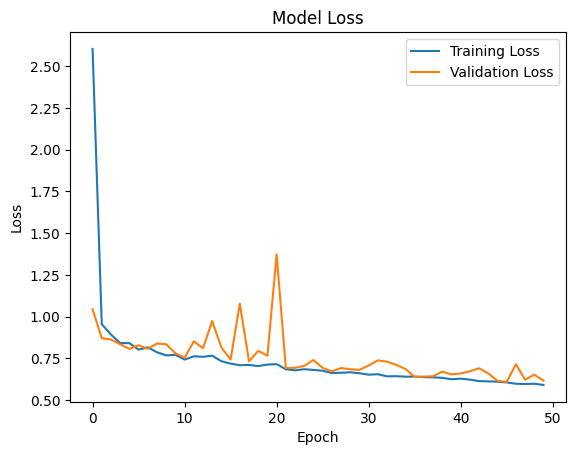

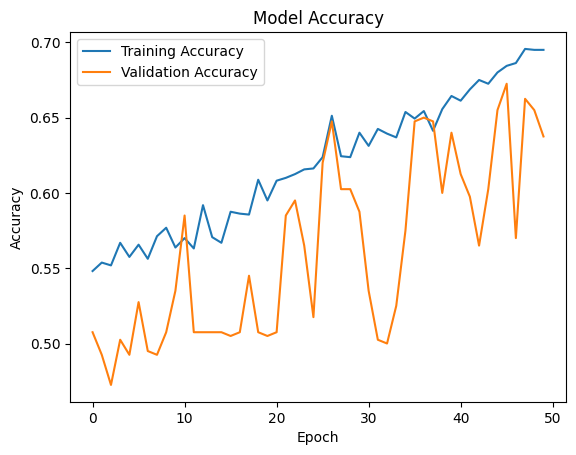

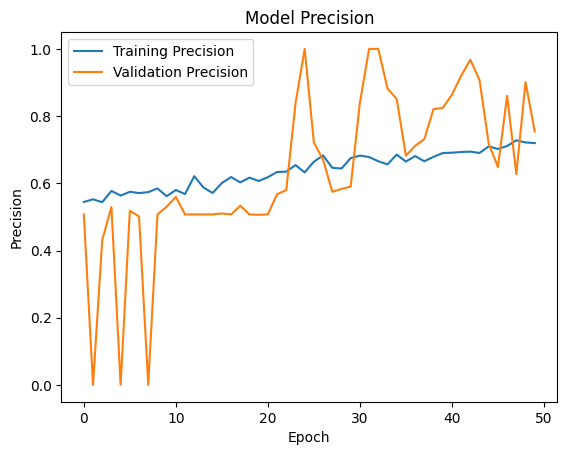

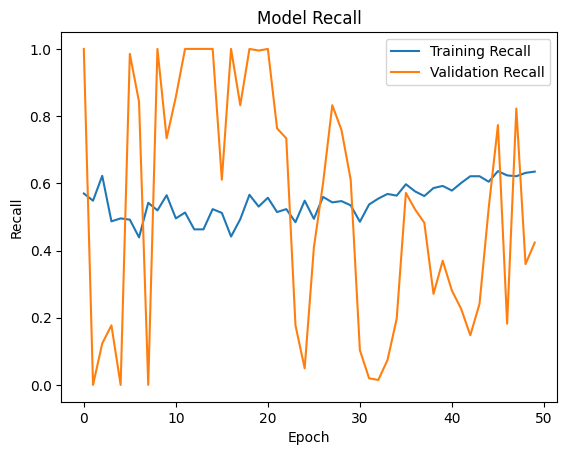

In [ ]:
import matplotlib.pyplot as plt

# 1) Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2) Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3) Plot Training & Validation Precision
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# 4) Plot Training & Validation Recall
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()



### Convert Model Scores to DataFrame

This code transforms the **model performance metrics** stored in the `model_scores` dictionary into a pandas **DataFrame** for easy visualization and analysis.

By structuring the evaluation results in a table format, we can compare key metrics such as:
- **Training & Validation Accuracy**: Measures overall classification performance.
- **Precision & Recall**: Evaluates the model's ability to correctly classify cats and dogs.
- **F1 Score**: Provides a balance between precision and recall.
- **Confusion Matrix**: Displays classification errors.

This table is essential for selecting the best-performing model.


In [ ]:
df_scores = pd.DataFrame.from_dict(model_scores, orient='index')
df_scores

,training_accuracy,validation_accuracy,train_val_acc_diff,precision,recall,f1_score,confusion_matrix
CNN,0.67625,0.6725,0.00375,0.64876,0.773399,0.705618,"[[112, 85], [46, 157]]"


### Saving Model Scores & Best CNN Model

This code ensures that the **model evaluation results** and the **best-trained CNN model** are securely stored for future reference and deployment.

1️ **Saving Model Scores**:  
- Converts the df_scores DataFrame into a **CSV file** (model_scores.csv).
- Saves it in the specified directory (/content/drive/MyDrive/BCU - MSc in AI/CNN/models).
- This CSV file provides a structured summary of model performance metrics.

2️ **Saving the Best CNN Model**:  
- The best-performing **CNN model** (based on Optuna optimization) is saved in the **HDF5 format** (CNN_model.h5).
- This allows for reloading the trained model without retraining it.

These saved files ensure that results and models can be shared, deployed, or further improved later.


In [ ]:
import os
import pandas as pd
import joblib

# 2) Save the DataFrame as a CSV
save_dir = '/content/drive/MyDrive/BCU - MSc in AI/CNN/models'
os.makedirs(save_dir, exist_ok=True)  # create directory if not exists

csv_path = os.path.join(save_dir, 'model_scores.csv')
df_scores.to_csv(csv_path, index=True)
print(f"Saved model scores to: {csv_path}")

# 3) Save each model in the models dict
for model_name, model_obj in models.items():
    if model_name == 'CNN':
        # best_model is your CNN (keras/tf model)
        h5_path = os.path.join(save_dir, 'CNN_model.h5')
        model_obj.save(h5_path)
        print(f"Saved CNN model to: {h5_path}")

Saved model scores to: /content/drive/MyDrive/BCU - MSc in AI/CNN/models/model_scores.csv
Saved CNN model to: /content/drive/MyDrive/BCU - MSc in AI/CNN/models/CNN_model.h5


# Prediction

### Preparing Test Image Data for Model Evaluation

This code processes test images by first sorting the dataset by id to align images with their labels. It then maps the sorted id values to corresponding images, converting them into a NumPy array and scaling pixel values between 0 and 1 for model compatibility. Finally, the shape of the processed data is printed to ensure consistency with the training set.


In [ ]:
import numpy as np

# Ensure the balanced dataframe is sorted by id to align with the image list
balanced_df_sorted = test_df.sort_values(by='id').reset_index(drop=True)

# Create a list of images corresponding to the ids in balanced_df.
# Since processed_test_imgs[i] corresponds to id = i+1, we select images using:
balanced_images = [test_imgs[int(img_id) - 1] for img_id in balanced_df_sorted['id']]

# Convert the list of PIL images into a NumPy array and scale pixel values to [0,1]
X_test_balanced = np.array([np.array(img) for img in balanced_images], dtype='float32') / 255.0

# Verify shapes
print("X_test_balanced shape:", X_test_balanced.shape)


X_test_balanced shape: (1000, 128, 128, 3)


### Predicting Test Images with CNN

The trained CNN model is used to predict the probabilities of test images belonging to either class (cat or dog). Since the model outputs probabilities, a threshold of 0.5 is applied to classify images as either 0 (cat) or 1 (dog).


In [ ]:
CNN_model = models["CNN"]
y_test_probs_CNN = CNN_model.predict(X_test_balanced)  # predicted probabilities

# it's a binary classification with sigmoid output:
y_test_pred_CNN = (y_test_probs_CNN > 0.5).astype(int)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


### Mapping Labels Back to Original Categories

The numerical labels (0 and 1) in the test dataset are mapped back to their original categorical values, converting 0 to "cat" and 1 to "dog" for easier interpretation.


In [ ]:
test_df = train_df['label'].map({ 0: 'cat', 1: 'dog'})

### Saving Predictions to CSV

The predicted class labels are added as a new column, "Predicted_Class", to the test dataframe. This allows the predictions to be stored alongside the original test image identifiers. The modified dataframe is then saved as a CSV file to Google Drive for further analysis or external validation.



In [ ]:
test_df["Predicted_Class"] = y_test_pred_CNN
test_df.to_csv("/content/drive/MyDrive/BCU - MSc in AI/CNN/test_predictions.csv", index=False)

In [ ]:
test_df

,label
0,cat
1,cat
2,cat
3,cat
4,cat
...,...
1995,dog
1996,dog
1997,dog
1998,dog
